### 상권 구분 코드 명으로 시각화

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv("/Users/crlee/pandas/2022_점포수.csv",encoding = 'cp949')
df

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,6,6,0,0,0,0,0
1,2022,4,U,관광특구,1001496,강남 마이스 관광특구,CS300042,주유소,1,1,0,0,0,0,0
2,2022,4,U,관광특구,1001496,강남 마이스 관광특구,CS300041,예술품,10,10,0,0,0,0,0
3,2022,4,U,관광특구,1001496,강남 마이스 관광특구,CS300038,자동차부품,10,10,0,0,0,0,0
4,2022,4,U,관광특구,1001496,강남 마이스 관광특구,CS300036,조명용품,14,14,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898063,2020,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,3,3,0,0,0,0,0
898064,2020,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,2,2,0,0,0,0,0
898065,2020,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,2,3,0,0,0,0,1
898066,2020,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,3,3,0,0,0,0,0


### 필요한 열만 추출

In [9]:
select_col = ['기준_년_코드','기준_분기_코드', '상권_구분_코드_명','상권_코드_명']
df2 = df[select_col]

In [10]:
### 2022년만 추출

In [11]:
df3 = df2[df2['기준_년_코드'] == 2022]
df3

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명
0,2022,4,관광특구,강남 마이스 관광특구
1,2022,4,관광특구,강남 마이스 관광특구
2,2022,4,관광특구,강남 마이스 관광특구
3,2022,4,관광특구,강남 마이스 관광특구
4,2022,4,관광특구,강남 마이스 관광특구
...,...,...,...,...
299660,2022,1,골목상권,이북5도청사
299661,2022,1,골목상권,이북5도청사
299662,2022,1,골목상권,이북5도청사
299663,2022,1,골목상권,이북5도청사


### 분기 별로 나눠서 합치기 

### 1분기

In [18]:
df3_1 = df3[df3['기준_분기_코드'] == 1]
df3_1

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명
224878,2022,1,관광특구,강남 마이스 관광특구
224879,2022,1,관광특구,강남 마이스 관광특구
224880,2022,1,관광특구,강남 마이스 관광특구
224881,2022,1,관광특구,강남 마이스 관광특구
224882,2022,1,관광특구,강남 마이스 관광특구
...,...,...,...,...
299660,2022,1,골목상권,이북5도청사
299661,2022,1,골목상권,이북5도청사
299662,2022,1,골목상권,이북5도청사
299663,2022,1,골목상권,이북5도청사


### 상권 코드 명 겹치는 것 제외 

In [20]:
df3_1 = df3_1.drop_duplicates(subset=['상권_코드_명'])
df3_1

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명
224878,2022,1,관광특구,강남 마이스 관광특구
224942,2022,1,관광특구,잠실 관광특구
225033,2022,1,관광특구,종로?청계 관광특구
225125,2022,1,관광특구,동대문패션타운 관광특구
225212,2022,1,관광특구,명동 남대문 북창동 다동 무교동 관광특구
...,...,...,...,...
299508,2022,1,골목상권,세검정
299549,2022,1,골목상권,대신고등학교
299569,2022,1,골목상권,세검정초등학교
299608,2022,1,골목상권,독립문역 1번


In [23]:
print(len(df3_1[df3_1['상권_구분_코드_명'] == '관광특구']))
print(len(df3_1[df3_1['상권_구분_코드_명'] == '발달상권']))
print(len(df3_1[df3_1['상권_구분_코드_명'] == '골목상권']))
print(len(df3_1[df3_1['상권_구분_코드_명'] == '전통시장']))


6
249
1090
320


### 2분기

In [24]:
df3_2 = df3[df3['기준_분기_코드'] == 2]
df3_2

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명
150004,2022,2,관광특구,강남 마이스 관광특구
150005,2022,2,관광특구,강남 마이스 관광특구
150006,2022,2,관광특구,강남 마이스 관광특구
150007,2022,2,관광특구,강남 마이스 관광특구
150008,2022,2,관광특구,강남 마이스 관광특구
...,...,...,...,...
224873,2022,2,골목상권,이북5도청사
224874,2022,2,골목상권,이북5도청사
224875,2022,2,골목상권,이북5도청사
224876,2022,2,골목상권,이북5도청사


In [25]:
df3_2 = df3_2.drop_duplicates(subset=['상권_코드_명'])
df3_2

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명
150004,2022,2,관광특구,강남 마이스 관광특구
150068,2022,2,관광특구,잠실 관광특구
150159,2022,2,관광특구,종로?청계 관광특구
150251,2022,2,관광특구,동대문패션타운 관광특구
150337,2022,2,관광특구,명동 남대문 북창동 다동 무교동 관광특구
...,...,...,...,...
224722,2022,2,골목상권,세검정
224762,2022,2,골목상권,대신고등학교
224782,2022,2,골목상권,세검정초등학교
224821,2022,2,골목상권,독립문역 1번


In [26]:
print(len(df3_2[df3_2['상권_구분_코드_명'] == '관광특구']))
print(len(df3_2[df3_2['상권_구분_코드_명'] == '발달상권']))
print(len(df3_2[df3_2['상권_구분_코드_명'] == '골목상권']))
print(len(df3_2[df3_2['상권_구분_코드_명'] == '전통시장']))

6
249
1090
320


### 상권 구분 코드 명 비율

#### 관광특구 6 구역  0.39%
#### 발달상권 249 구역 16.15%
#### 골목상권 1090 구역 70.98%
#### 전통시장 320 구역 20.47%


### 시각화

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
rc('font', family='AppleGothic')


In [3]:
labels = ['관광특구', '발달상권', '골목상권', '전통시장']
#labels = ['A', 'B', 'C', 'D']
sizes = [0.39, 16.15, 70.98, 20.47]  # 각 항목의 크기 (비율)

([<matplotlib.patches.Wedge at 0x7fa62c3f5030>,
 [Text(1.0999292021884508, 0.012479990908575827, '관광특구'),
  Text(0.9692588563099074, 0.5201319731229859, '발달상권'),
  Text(-1.0928186123956385, 0.12548896525858966, '골목상권'),
  Text(0.9106527748079501, -0.6170182523512421, '전통시장')])

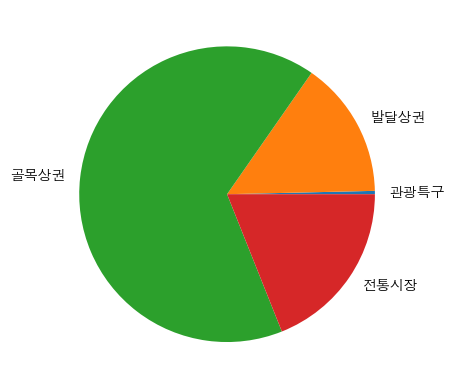

In [4]:
plt.pie(sizes, labels=labels)

Text(0.5, 1.0, '파이 차트')

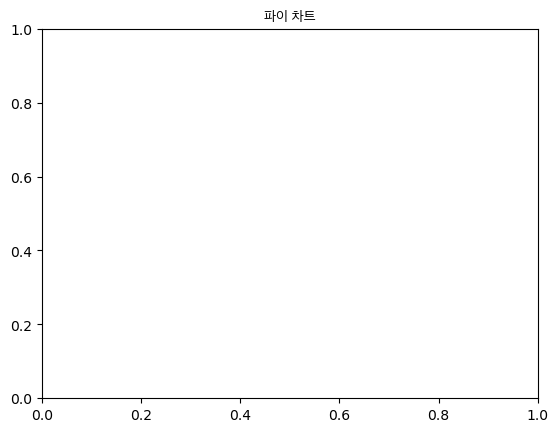

In [51]:
plt.title('상권구분코드 비율', fontproperties=font_prop)

In [52]:
plt.show()